# Portugal's mortality stats

Data acquired from http://evm.min-saude.pt/

_Assignement: try to edit the markdown to explain the commands..._


In [1]:
#!pip3 install dateparser
import dateparser

import pandas as pd
import numpy as np

## Read the data

Files data/portugal_mortality/causeXXXX.csv contain data associated the death causes for each day

In [2]:
def read_data(prefix):
    def my_date_parser(days):
        days = [dateparser.parse(str(year) + '-' + d, languages=['pt']) for d in days]
        return days
    
    df = pd.DataFrame()
    for year in range(2014, 2023):
        filename = f'./data/portugal_mortality/{prefix}{year}.csv'
        temp_df = pd.read_csv(filename)
        temp_df['Data (mm-dd)'] = my_date_parser(temp_df['Data (mm-dd)'])
        # append to the final dataframe
        df = pd.concat([df, temp_df], ignore_index=True)

    # convert the date (string) to datetime
    df['date'] = pd.to_datetime(df['Data (mm-dd)'])
    df = df.drop('Data (mm-dd)', axis=1)
    return df
        
cause_df = read_data('cause')
age_df = read_data('grupo_etario')

In [3]:
cause_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Morte natural           3287 non-null   int64         
 1   Causa externa           3287 non-null   int64         
 2   Sujeito a investigação  3287 non-null   int64         
 3   date                    3287 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 102.8 KB


In [4]:
cause_df.head()

,Morte natural,Causa externa,Sujeito a investigação,date
0,333,5,37,2014-01-01
1,329,10,55,2014-01-02
2,354,7,38,2014-01-03
3,299,2,26,2014-01-04
4,327,2,30,2014-01-05


In [5]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   < 1 ano       3287 non-null   int64         
 1   1-4 anos      3287 non-null   int64         
 2   5-14 anos     3287 non-null   int64         
 3   15-24 anos    3287 non-null   int64         
 4   25-34 anos    3287 non-null   int64         
 5   35-44 anos    3287 non-null   int64         
 6   45-54 anos    3287 non-null   int64         
 7   55-64 anos    3287 non-null   int64         
 8   65-74 anos    3287 non-null   int64         
 9   > 75 anos     2191 non-null   float64       
 10  Desconhecido  3287 non-null   int64         
 11  75-84 anos    1096 non-null   float64       
 12  ≥ 85 anos     1096 non-null   float64       
 13  date          3287 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 359.6 KB


In [6]:
age_df.head()

,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,45-54 anos,55-64 anos,65-74 anos,> 75 anos,Desconhecido,75-84 anos,≥ 85 anos,date
0,0,0,0,1,2,7,13,27,60,265.0,0,NaN,NaN,2014-01-01
1,0,0,2,0,2,6,18,27,71,268.0,0,NaN,NaN,2014-01-02
2,2,0,1,1,6,7,20,35,61,266.0,0,NaN,NaN,2014-01-03
3,1,0,0,1,1,5,20,23,47,229.0,0,NaN,NaN,2014-01-04
4,0,0,0,0,3,2,15,32,54,253.0,0,NaN,NaN,2014-01-05


In [7]:
age_df.tail()

,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,45-54 anos,55-64 anos,65-74 anos,> 75 anos,Desconhecido,75-84 anos,≥ 85 anos,date
3282,0,0,0,1,5,4,14,28,44,NaN,0,122.0,181.0,2022-12-27
3283,1,1,0,2,0,3,18,41,47,NaN,0,88.0,144.0,2022-12-28
3284,1,0,0,3,0,3,10,28,49,NaN,0,124.0,180.0,2022-12-29
3285,1,0,0,3,3,3,13,29,68,NaN,0,91.0,174.0,2022-12-30
3286,1,0,0,1,1,5,14,27,53,NaN,0,97.0,169.0,2022-12-31


<Axes: xlabel='date'>

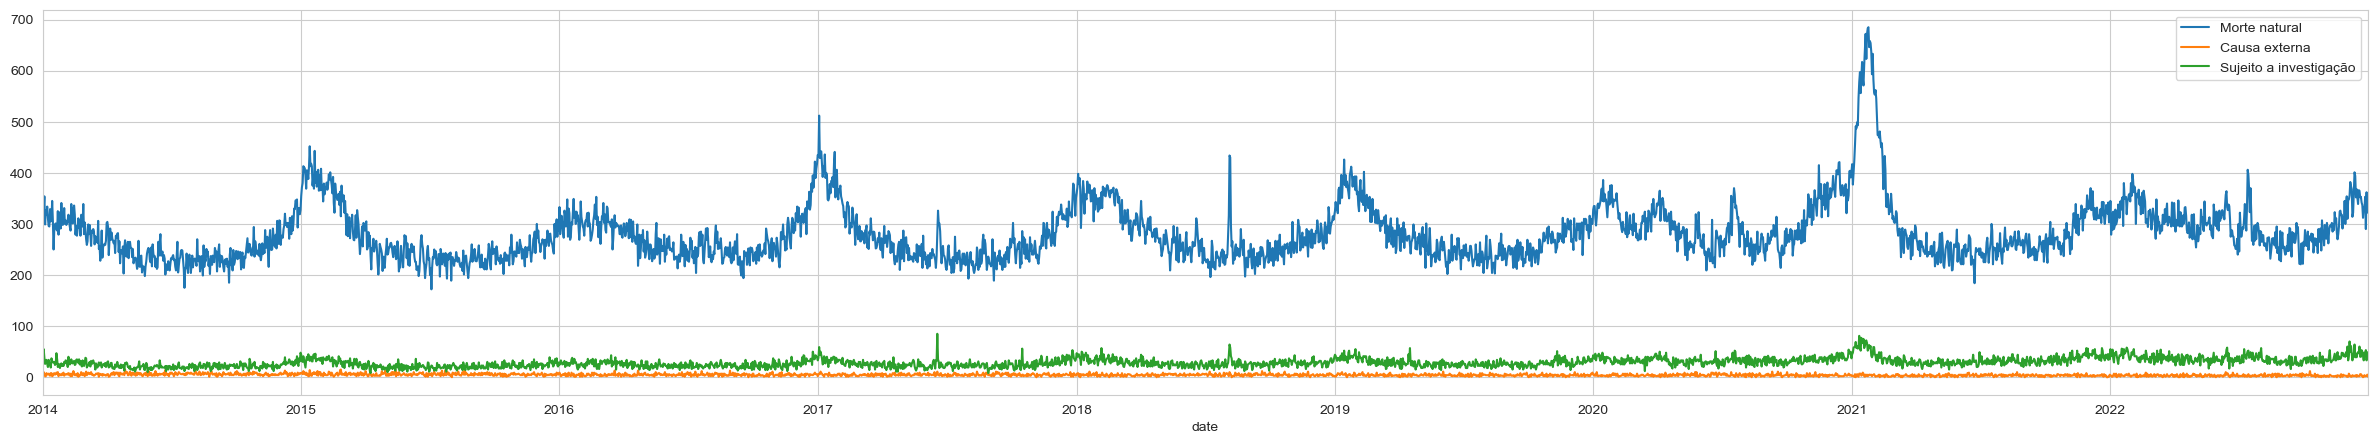

In [8]:
cause_df[['Morte natural', 'Causa externa', 'Sujeito a investigação', 'date']].set_index('date').plot(figsize=(30, 5))

In [9]:
age_df.columns

Index(['< 1 ano', '1-4 anos', '5-14 anos', '15-24 anos', '25-34 anos',
       '35-44 anos', '45-54 anos', '55-64 anos', '65-74 anos', '> 75 anos',
       'Desconhecido', '75-84 anos', '≥ 85 anos', 'date'],
      dtype='object')

<Axes: xlabel='date'>

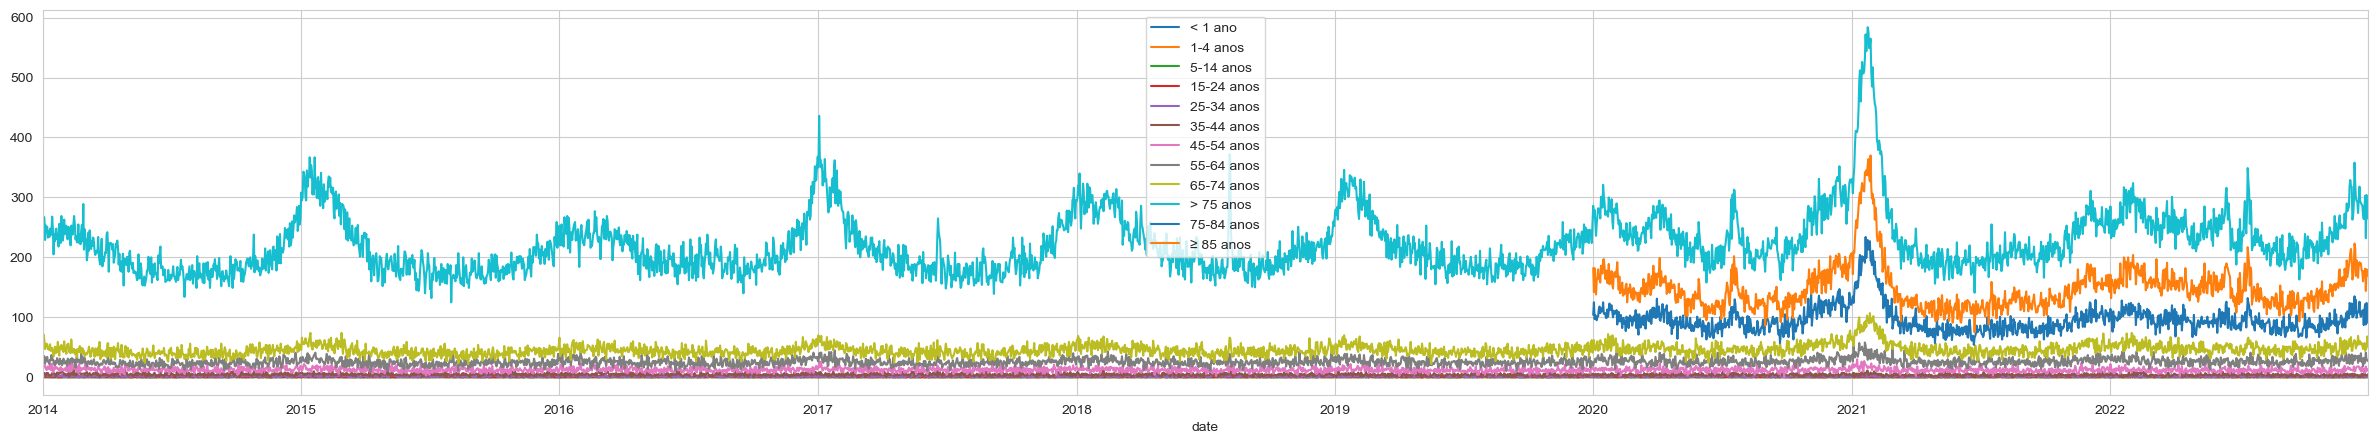

In [10]:
# recomputing the > 75 anos column to include the 75-84 anos and the >= 85 anos
mask = np.isnan(age_df['> 75 anos'])
age_df[mask].tail()
age_df.loc[mask, '> 75 anos'] = age_df.loc[mask, '75-84 anos'] + age_df.loc[mask, '≥ 85 anos']

age_df[['< 1 ano', '1-4 anos', '5-14 anos', '15-24 anos', '25-34 anos', '35-44 anos', '45-54 anos',
        '55-64 anos', '65-74 anos', '> 75 anos', '75-84 anos', '≥ 85 anos', 'date']].set_index('date').plot(figsize=(30, 5))

Lets:
 * add the total number of deaths
 * join the data from the cause dataframe with the age dataframe

In [11]:
df = cause_df.merge(age_df, left_on='date', right_on='date')

df['total'] = df['Morte natural'] + df['Causa externa'] + df['Sujeito a investigação']
df.tail()

,Morte natural,Causa externa,Sujeito a investigação,date,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,45-54 anos,55-64 anos,65-74 anos,> 75 anos,Desconhecido,75-84 anos,≥ 85 anos,total
3282,353,2,44,2022-12-27,0,0,0,1,5,4,14,28,44,303.0,0,122.0,181.0,399
3283,290,2,53,2022-12-28,1,1,0,2,0,3,18,41,47,232.0,0,88.0,144.0,345
3284,362,3,33,2022-12-29,1,0,0,3,0,3,10,28,49,304.0,0,124.0,180.0,398
3285,331,5,49,2022-12-30,1,0,0,3,3,3,13,29,68,265.0,0,91.0,174.0,385
3286,322,1,45,2022-12-31,1,0,0,1,1,5,14,27,53,266.0,0,97.0,169.0,368


Plot ...

<Axes: xlabel='date'>

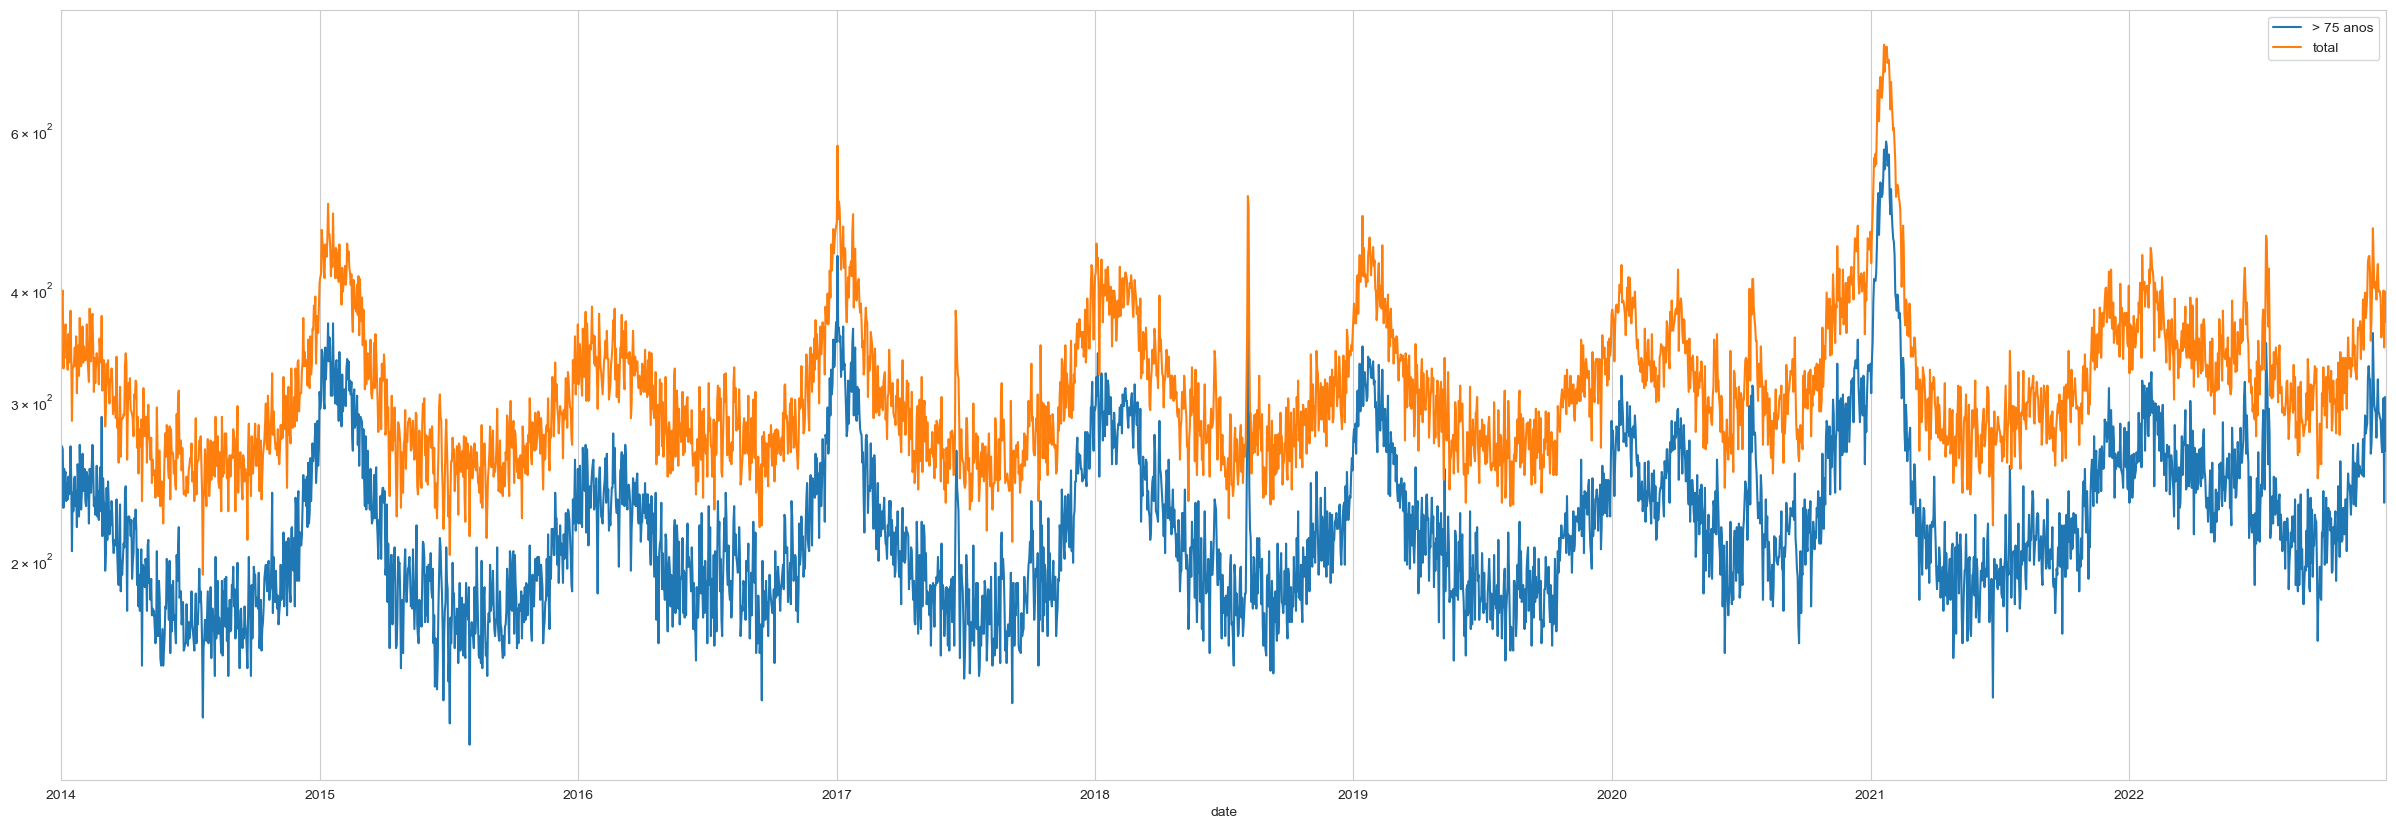

In [12]:
df[['> 75 anos', 'total', 'date']].set_index('date').plot(logy=True, figsize=(30, 10))

## joining the temperature (from lisbon)

Now, we are going to join the temperature from Lisbon to the mortality and chech for correlations

In [13]:
temp_df = pd.read_csv('data/portugal_meteo/meteo_lx.csv', 
                      parse_dates=['YEARMODA'], 
                      date_parser=lambda t:pd.to_datetime(str(t),format='%Y%m%d')
                     )
temp_df.tail()

/var/folders/9j/nv8p1yk95y5df79ppmw307_h0000gn/T/ipykernel_47524/969024620.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  temp_df = pd.read_csv('data/portugal_meteo/meteo_lx.csv',


,STN---,WBAN,YEARMODA,TEMP,1?,DEWP,2?,SLP,3?,STP,...,WDSP,6?,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
2239,85360,99999,2020-03-18,64.2,24,48.3,24,9999.9,0,9999.9,...,11.4,24,14.0,19.0,73.4,57.2,0.00,999.9,0,NaN
2240,85360,99999,2020-03-19,61.1,24,50.3,24,9999.9,0,9999.9,...,6.5,24,11.1,21.0,71.6,53.6,0.00,999.9,0,NaN
2241,85360,99999,2020-03-20,54.4,24,50.1,24,9999.9,0,9999.9,...,6.0,24,9.9,999.9,57.2,48.2,99.99,999.9,10000,NaN
2242,85360,99999,2020-03-21,51.4,24,45.5,24,9999.9,0,9999.9,...,3.7,24,8.0,17.1,59.0,42.8,99.99,999.9,10000,NaN
2243,85360,99999,2020-03-22,54.2,23,45.9,23,9999.9,0,9999.9,...,6.4,23,9.9,999.9,66.2,46.4,0.00,999.9,0,NaN


In [14]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   STN---       2244 non-null   int64         
 1   WBAN         2244 non-null   int64         
 2   YEARMODA     2244 non-null   datetime64[ns]
 3   TEMP         2244 non-null   float64       
 4   1?           2244 non-null   int64         
 5   DEWP         2244 non-null   float64       
 6   2?           2244 non-null   int64         
 7   SLP          2244 non-null   float64       
 8   3?           2244 non-null   int64         
 9   STP          2244 non-null   float64       
 10  4?           2244 non-null   int64         
 11  VISIB        2244 non-null   float64       
 12  5?           2244 non-null   int64         
 13  WDSP         2244 non-null   float64       
 14  6?           2244 non-null   int64         
 15  MXSPD        2244 non-null   float64       
 16  GUST  

In [15]:
def F2C(d):
    return (d - 32.) * (5. / 9.)

meteo_df = pd.DataFrame()
meteo_df['date'] = temp_df['YEARMODA'] 
meteo_df['max'] = F2C(temp_df['MAX']) 
meteo_df['min'] = F2C(temp_df['MIN']) 
meteo_df['rained'] = temp_df['PRCP'] > 0

In [16]:
meteo_df.describe()

,date,max,min
count,2244,2244.000000,2244.000000
mean,2017-02-14 07:27:54.866310144,23.595687,12.832442
min,2014-01-01 00:00:00,7.000000,0.000000
25%,2015-08-06 18:00:00,16.000000,9.000000
50%,2017-02-17 12:00:00,20.000000,13.000000
75%,2018-09-01 06:00:00,26.000000,17.000000
max,2020-03-22 00:00:00,5537.722222,29.000000
std,NaN,116.615259,4.373602


are there strange values? maybe in the MAX temperature!?

In [17]:
meteo_df.sort_values(by='max', ascending=False)

,date,max,min,rained
751,2016-02-13,5537.722222,14.0,True
1654,2018-08-04,44.000000,29.0,False
1653,2018-08-03,42.000000,24.0,False
1652,2018-08-02,41.000000,22.0,False
1241,2017-06-17,40.000000,22.0,True
...,...,...,...,...
1114,2017-02-10,10.000000,5.0,True
724,2016-01-17,10.000000,5.0,True
765,2016-02-27,8.000000,4.0,True
698,2015-12-22,7.000000,6.0,False


which lines are problematic?

In [18]:
problematic_idx = meteo_df[meteo_df['max']>50].index
problematic_idx

Index([751], dtype='int64')

In [19]:
meteo_df = meteo_df.drop(problematic_idx, axis=0)

In [20]:
df = df.merge(meteo_df, left_on='date', right_on='date')
df.tail()

,Morte natural,Causa externa,Sujeito a investigação,date,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,...,55-64 anos,65-74 anos,> 75 anos,Desconhecido,75-84 anos,≥ 85 anos,total,max,min,rained
2238,285,7,40,2020-03-18,1,0,0,1,0,5,...,21,48,247.0,0,106.0,141.0,332,23.0,14.0,False
2239,326,4,39,2020-03-19,0,0,0,1,0,3,...,21,62,266.0,1,94.0,172.0,369,22.0,12.0,False
2240,324,3,38,2020-03-20,1,0,0,0,0,2,...,25,59,266.0,0,94.0,172.0,365,14.0,9.0,True
2241,318,4,31,2020-03-21,1,0,0,0,1,6,...,26,50,252.0,0,93.0,159.0,353,15.0,6.0,True
2242,294,4,37,2020-03-22,1,0,0,0,2,1,...,27,43,249.0,2,112.0,137.0,335,19.0,8.0,False


<Axes: >

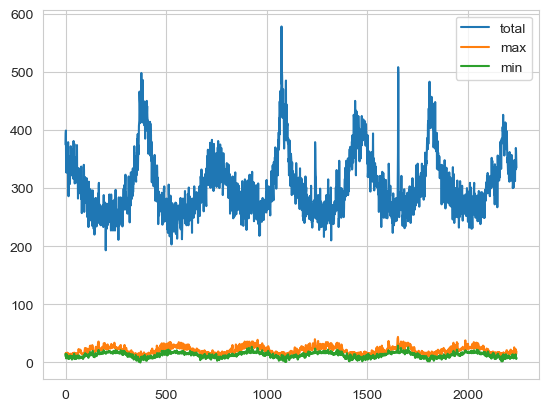

In [21]:

df[['total', 'max', 'min']].plot()

maybe it is better if data is normalized. Furthermore its seam that high temperatures are worst, so lets plot them only

<Axes: >

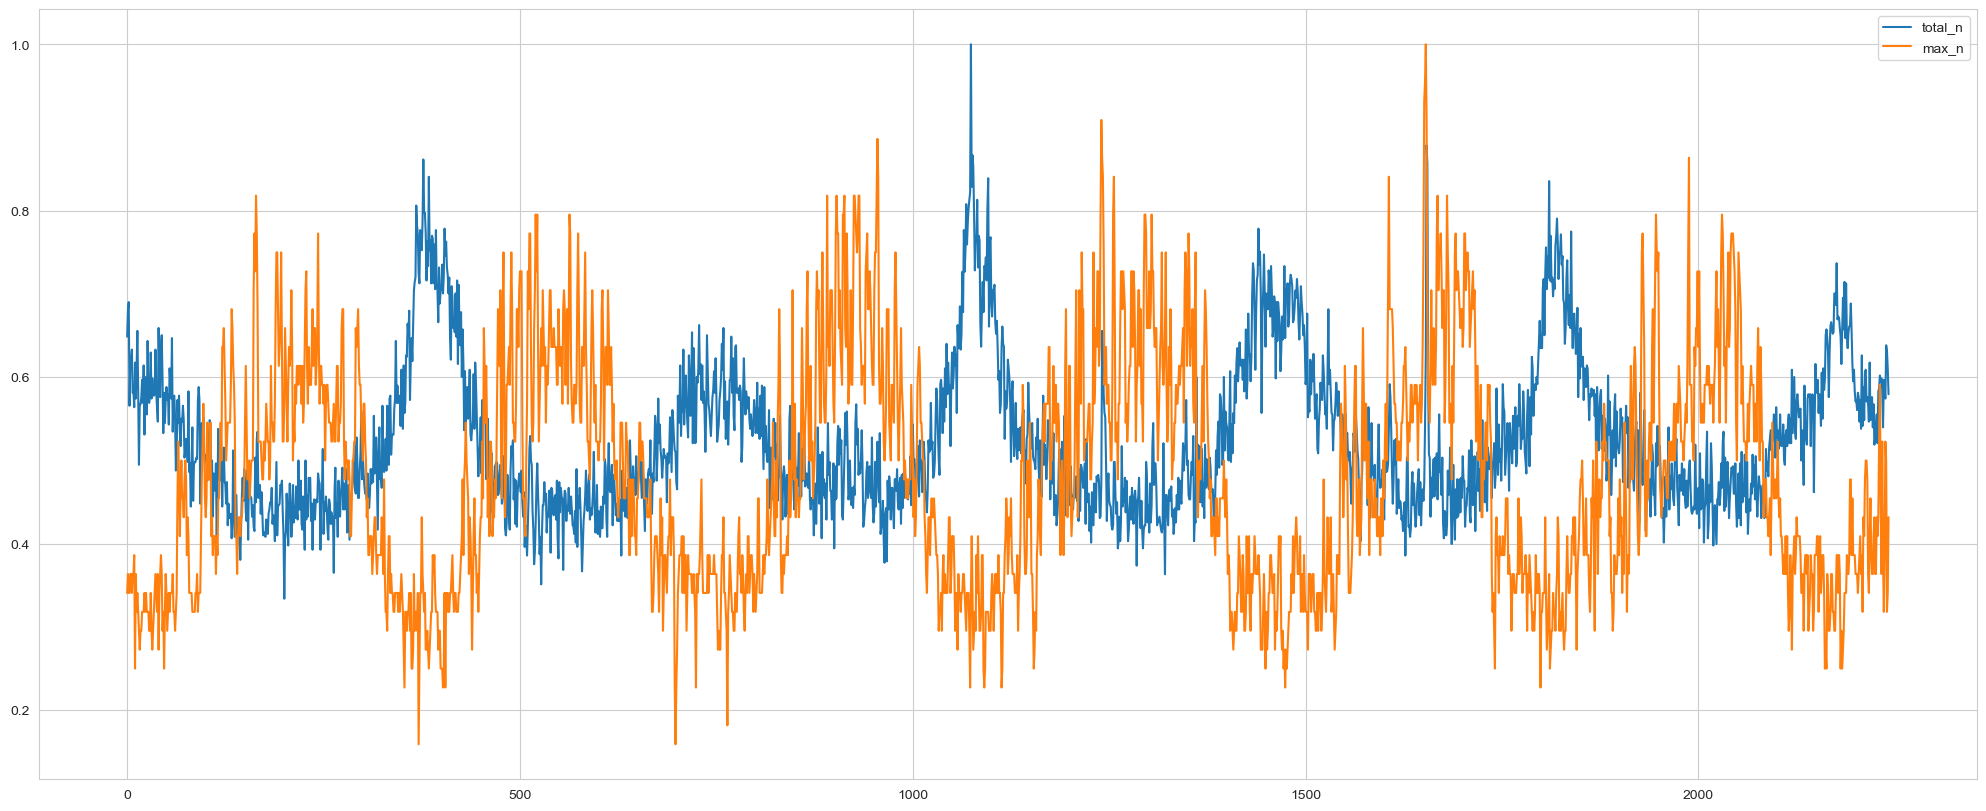

In [22]:
for col in ['total', 'max']:
    df[col + '_n'] = df[col] / df[col].max()

df[['total_n', 'max_n']].plot(figsize=(25,10))

<Axes: xlabel='max', ylabel='total'>

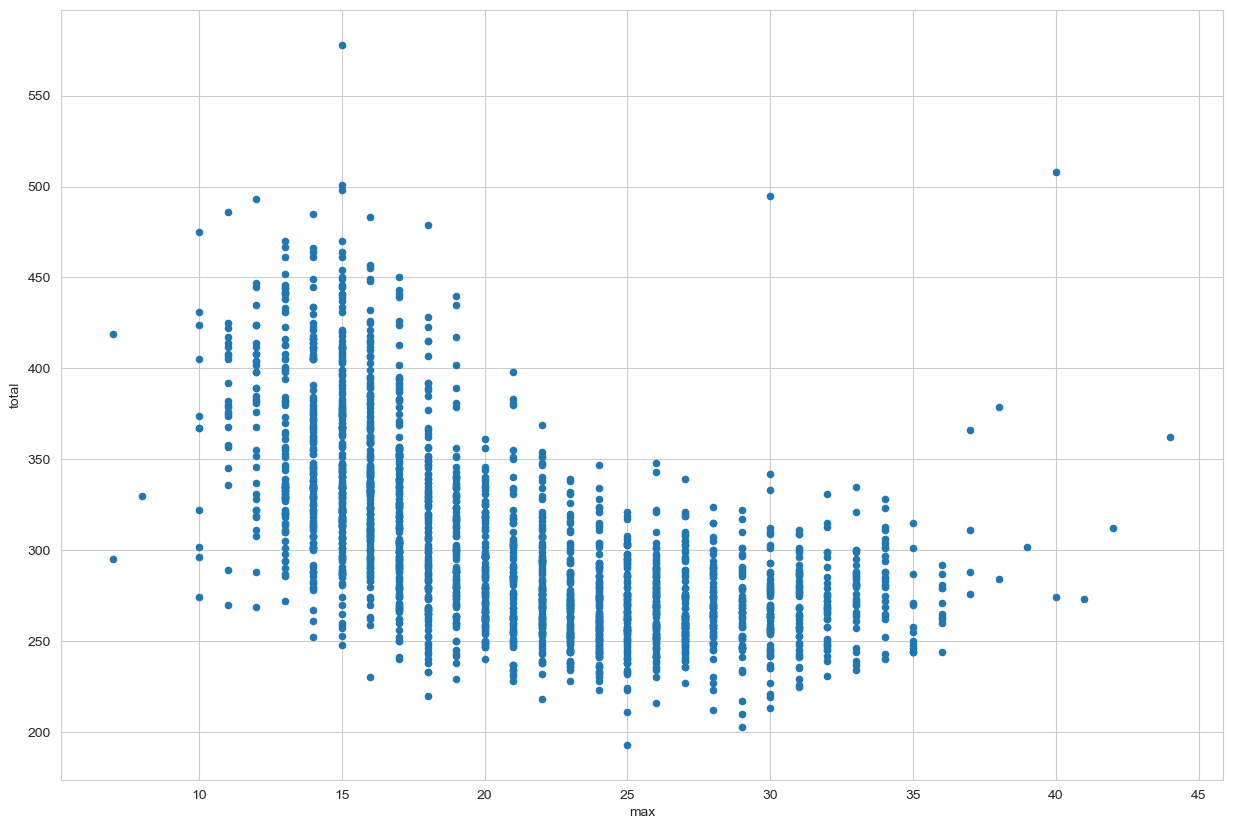

In [23]:
df.plot(x='max', y='total', kind='scatter', figsize=(15,10))

## Group data
To group data by month we can start by adding a new columns with year and month

In [24]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['day_week'] = df.date.dt.dayofweek

In [25]:
df.groupby(by='day_week').mean()

,Morte natural,Causa externa,Sujeito a investigação,date,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,...,≥ 85 anos,total,max,min,rained,total_n,max_n,year,month,day
day_week,,,,,,,,,,,,,,,,,,,,,
0,275.737500,5.459375,28.543750,2017-02-13 16:16:30.000000000,0.650000,0.143750,0.287500,0.968750,1.665625,4.581250,...,159.181818,309.740625,21.153125,12.665625,0.334375,0.535883,0.480753,2016.634375,6.381250,15.565625
1,274.856250,5.134375,26.287500,2017-02-14 16:16:30.000000000,0.790625,0.181250,0.259375,0.843750,1.568750,4.709375,...,153.636364,306.278125,20.893750,12.765625,0.312500,0.529893,0.474858,2016.637500,6.375000,15.615625
2,271.925234,5.068536,25.791277,2017-02-12 04:29:09.532710400,0.766355,0.177570,0.249221,0.735202,1.482866,4.504673,...,154.166667,302.785047,21.071651,12.772586,0.295950,0.523850,0.478901,2016.632399,6.352025,15.685358
3,274.080997,5.115265,25.760125,2017-02-13 04:29:09.532710400,0.697819,0.146417,0.264798,0.781931,1.464174,4.741433,...,160.583333,304.956386,21.140187,12.965732,0.345794,0.527606,0.480459,2016.635514,6.345794,15.738318
4,273.453125,4.746875,25.606250,2017-02-15 00:45:00.000000000,0.703125,0.156250,0.212500,0.881250,1.625000,4.634375,...,155.000000,303.806250,21.100000,12.912500,0.334375,0.525616,0.479545,2016.637500,6.384375,15.678125
5,271.993750,4.781250,24.881250,2017-02-16 08:37:30.000000000,0.743750,0.162500,0.200000,0.871875,1.690625,4.462500,...,152.000000,301.656250,21.253125,12.871875,0.356250,0.521897,0.483026,2016.640625,6.390625,15.681250
6,268.501558,4.669782,25.666667,2017-02-16 05:00:33.644859904,0.623053,0.177570,0.264798,0.937695,1.535826,4.498442,...,153.500000,298.838006,21.348910,12.869159,0.373832,0.517021,0.485202,2016.641745,6.376947,15.542056


We can see that aparently there is almost no influence on the days of week (look at the scale!)

<Axes: xlabel='day_week'>

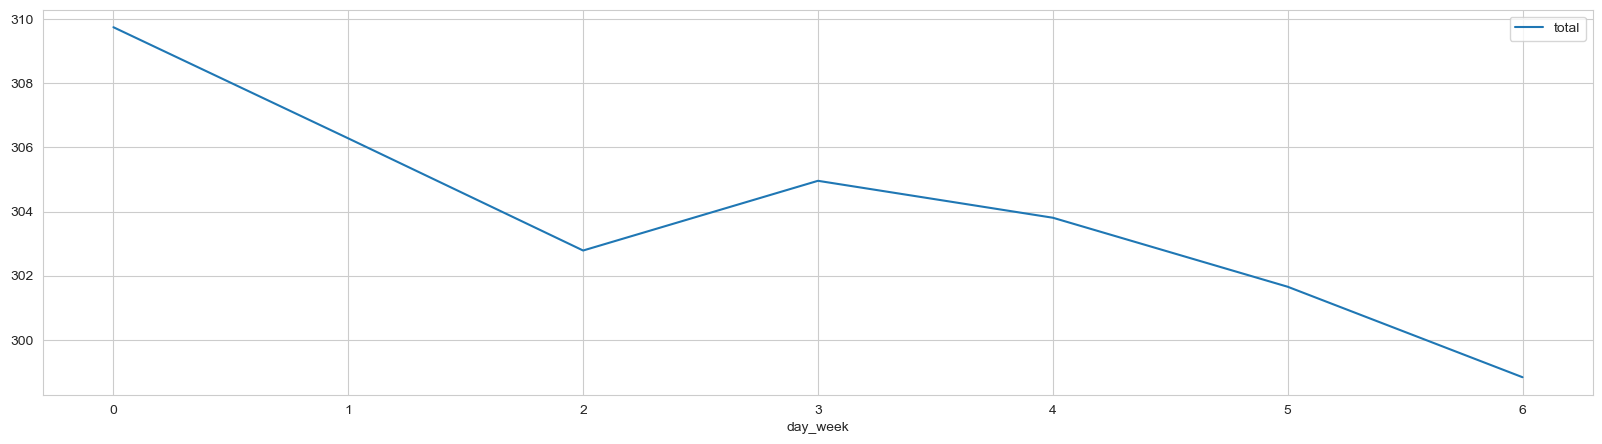

In [26]:
df[['total', 'day_week']].groupby(by='day_week').mean().plot(figsize=(20,5))

<Axes: xlabel='day_week'>

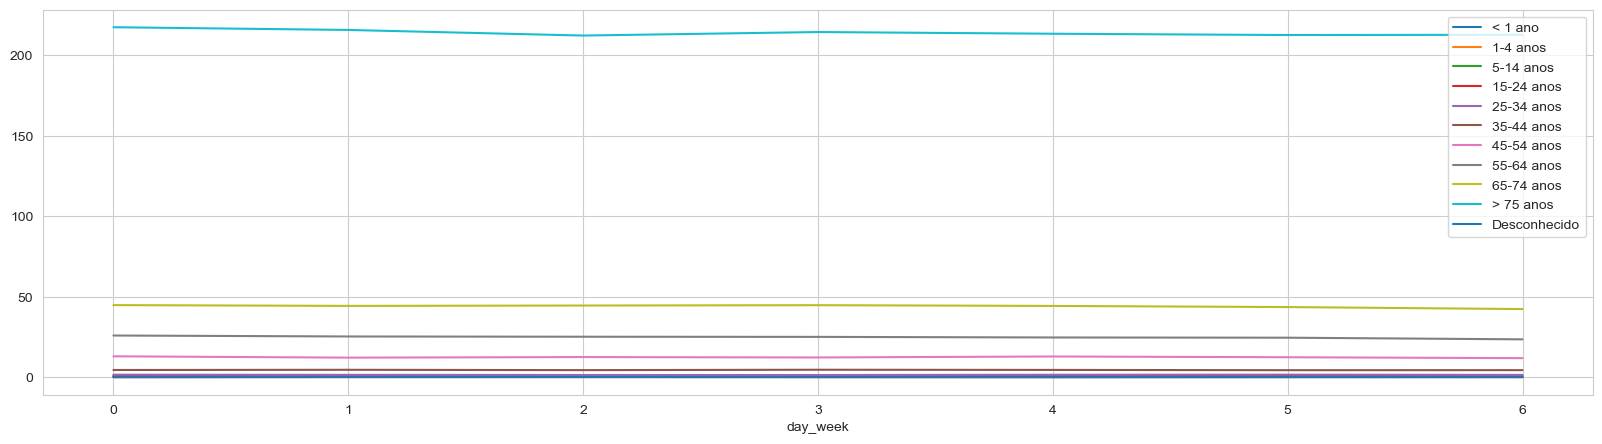

In [27]:
df[['< 1 ano', '1-4 anos', 
   '5-14 anos', '15-24 anos', '25-34 anos', '35-44 anos', '45-54 anos', '55-64 anos', 
   '65-74 anos', '> 75 anos', 'Desconhecido', 'day_week']].groupby(by='day_week').mean().plot(figsize=(20,5)) 

What happens if think the number of deaths by month?

In [28]:
df[['total', 'month']].groupby(by='month').mean()

,total
month,
1,393.453704
2,362.025381
3,322.178744
4,299.786164
5,275.688172
6,270.355556
7,261.365591
8,267.672043
9,261.838889


maybe there is something...?

<Axes: xlabel='month'>

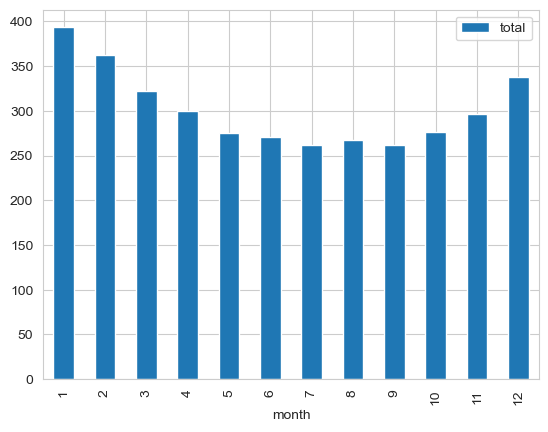

In [29]:
df[['total', 'month']].groupby(by='month').mean().plot(kind='bar')

Has the rain anything to do with it?

In [30]:
df.groupby(by='rained').mean()

,Morte natural,Causa externa,Sujeito a investigação,date,< 1 ano,1-4 anos,5-14 anos,15-24 anos,25-34 anos,35-44 anos,...,≥ 85 anos,total,max,min,total_n,max_n,year,month,day,day_week
rained,,,,,,,,,,,,,,,,,,,,,
False,266.873069,5.134990,25.477502,2017-03-12 12:23:41.625251840,0.720618,0.162525,0.253862,0.882471,1.588986,4.507723,...,152.339623,297.485561,22.966420,13.309604,0.514681,0.521964,2016.687710,6.617864,15.786434,2.948287
True,284.901857,4.722812,27.258621,2016-12-25 01:08:45.198938880,0.690981,0.165782,0.237401,0.815650,1.550398,4.753316,...,161.250000,316.883289,17.525199,11.888594,0.548241,0.398300,2016.537135,5.887268,15.362069,3.104775


<Axes: xlabel='rained'>

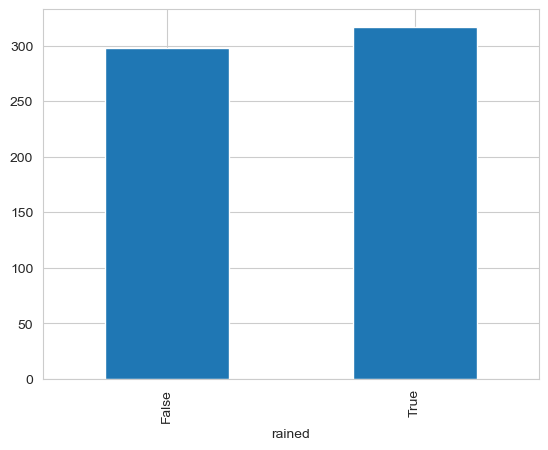

In [31]:
df.groupby(by='rained').mean().total.plot(kind='bar')